# Israel Credit Market  - Basic Ampirics 
This Notebook get the Data from BoI FAME system (van Excel).

Then we show 

* National Accounts
* Credit amounts
* Calculate leverage ratios
* Intrest Rates

In [1]:
## Using Jupter and Spyder\Atom Together
## https://medium.com/@rrfd/cookiecutter-data-science-organize-your-projects-atom-and-jupyter-2be7862f487e
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
this_project_path = 'c:\\Users\\u30l\\GitHub\\credit_market_macro_model'
this_NB_path = this_project_path+'\\src\\data'
import os
current_NB_path = os.path.abspath(os.getcwd())
os.chdir(this_project_path)

## https://medium.com/@rrfd/cookiecutter-data-science-organize-your-projects-atom-and-jupyter-2be7862f487e :
# Link ./src/ with your notebook
# Run this in the project root
! pip3 install --editable .

Obtaining file:///C:/Users/u30l/GitHub/credit_market_macro_model
  Attempting uninstall: src
    Found existing installation: src 0.1.0
    Uninstalling src-0.1.0:
      Successfully uninstalled src-0.1.0
  Running setup.py develop for src


In [3]:
# my functions and oter iports
import src.config as config
from src.config import my_pd as pd
from src.config import my_plt as plt
file_date = config.file_date
from src.funct.ncDate import period
from src.funct import ncDate, ncPlot, ncStat
from src.funct.ncPlot import multi_save, add_Rec, plot1ax, plot2axs, colors
from src.funct.ncStat import ols_fit,regs_plot
import src.funct.ncPublish as ncPub

# very importent - get Project Main Path
project_path = config.project_path
if  this_project_path!= str(project_path):
    print('WARRNING: NOT CORRECT PROJECT PATH !')
if this_NB_path !=  current_NB_path:
    print('WARRNING: NOT CORRECT Notebook PATH !')

os.chdir(project_path)
print('This project path is:     '+str(project_path))
print('Current Notebook path is: '+str(current_NB_path))

This project path is:     c:\Users\u30l\GitHub\credit_market_macro_model
Current Notebook path is: c:\Users\u30l\GitHub\credit_market_macro_model\src\data


In [4]:
import numpy as np
#import seaborn as sns  # Machin Learning module

import statsmodels as st
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

In [6]:
# get US data for benchmarking:
import src.data.read_from_Fred as fred
path='data/processed/'
df_US   = fred.Get_data(path)

### Loading the data and make first impration about it
 __VERY IMPORTENT__ : Pataya \ FAME excel file have hiden sheet (this is real SHEET)!!!
so always Check in Excel under File menu, "Check if there are problems" and "check Doc"
so we must use sheet_name=1 __or__ use explicit sheet name

# Israe National Accounts

In [7]:
path = 'data/raw/Pataya_Activity/'
file_name = 'Fame_NationalAccount.xlsx'
nrows=8
df_NA_info = pd.read_excel(path+file_name,sheet_name='גיליון1',index_col=0,header=0,nrows=nrows)
#df_NA_info

In [8]:
nrows=8
df_NA = pd.read_excel(path+file_name,sheet_name='גיליון1',index_col=0,header=nrows)
df_NA.index.name = 'date'
#df_NA

* Calculate Moving Average, Siesonal Adjustment, HP Trned and Cycle, YoY Changes

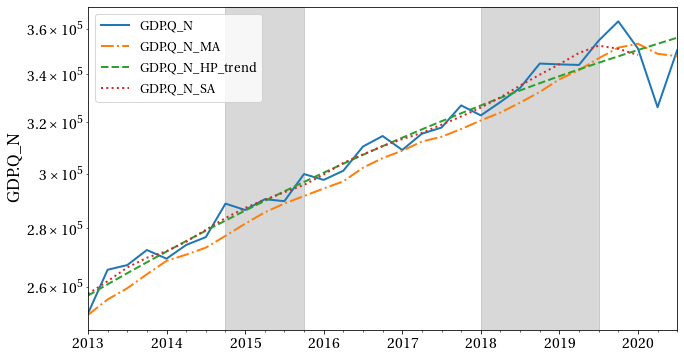

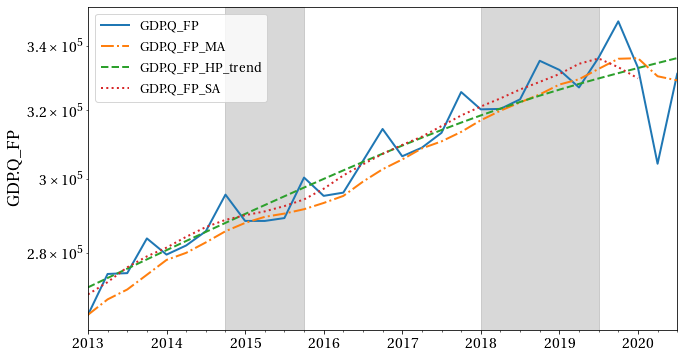

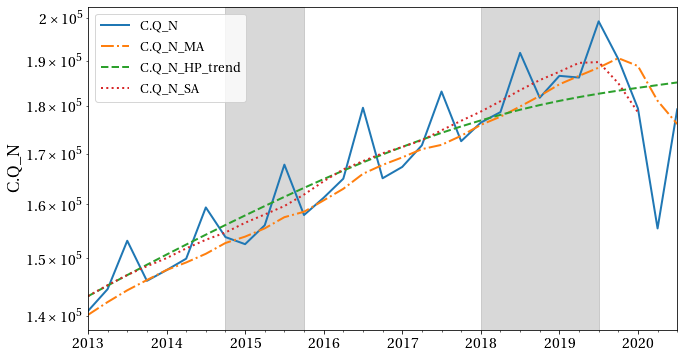

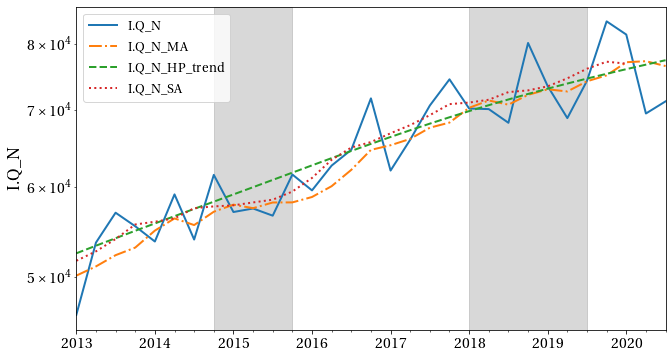

In [9]:
lamb = 1600
used_col = ['GDP.Q_N', 'GDP.Q_FP', 'C.Q_N' , 'I.Q_N']
for col in used_col:
    df_NA[col+'_MA'] = df_NA[col].rolling(window=4).mean()
    df_NA[col+'_SA'] = seasonal_decompose(df_NA[col].dropna(), model='additive').trend
    df_NA[col+'_HP_cycle'], df_NA[col+'_HP_trend'] = sm.tsa.filters.hpfilter(df_NA[[col]].dropna(), lamb=lamb)    
    df_NA  = ncStat.YoY(col,df_NA)
    df_NA  = ncStat.YoY(col,df_NA,ahead=1)
    df_NA  = ncStat.YoY(col,df_NA,ahead=2)
    df_NA  = ncStat.YoY(col,df_NA,ahead=3)

    mask = period(df_NA.index,start='2013-01-01')
    linestyles =        ['-', '-.','--',':',  '-.','--','-.','-']
    ax= plot1ax(columns=[col,col+'_MA',col+'_HP_trend',col+'_SA'], df=df_NA[mask],
                linestyles=linestyles, markers='',xlabel='',logy=True)
    add_Rec(ax,df_US,'ISRRECM')
    plt.show()

# All Debt by Segmentation
Reading and manipulating the data. main stages,

In [10]:
#pataya_Debt_total
path = 'data/raw/Pataya_Credit/' 
file_name = 'All_Credit_Segmentation.xlsx'
nrows=7
df_CreditSeg_info = pd.read_excel(path+file_name,sheet_name='גיליון1',index_col=0,header=0,nrows=nrows)
#df_CreditSeg_info

In [11]:
df_CreditSeg = pd.read_excel(path+file_name,sheet_name='גיליון1',index_col=0,header=7)
#alternative: pd.read_excel(file_path_name,sheet_name=1,index_col=0,header=0,skiprows=list(range(1,8)))
df_CreditSeg.index.name = 'date'
new_columns = [col.split('.')[0] for col in df_CreditSeg.columns]
df_CreditSeg.columns = new_columns

* **Bug had been fixed by Yael Dahari**: debt_households_nonhousing_total.m is wrong until ~1999 

In [12]:
#correct_values = df_CreditSeg['debt_hh_housing_debt'].dropna()
#df_CreditSeg['debt_households_nonhousing_total'] = df_CreditSeg.loc[correct_values.index,['debt_households_nonhousing_total']]

In [13]:
#list(df_CreditSeg.columns)

#### Sigmantation

* business / hh

* to_banks / to_mosadim / to_cc / to_abroad / to_gov/ to_hh / to_banks_current_accounts

* loans / bonds / tbonds / ntbonds

* cpi_inedxed / fx_inedxed / uninedxed

* nonhousing / housing

In [14]:
new_names=  {'debt_business_sector_to_banks_total':'debt_business_to_banks' ,
            'debt_business_sector_to_banks':'debt_business_to_banks_loans',
            'debt_business_sector_to_banks_bonds':'debt_business_to_banks_bonds',
            'total_debt_busniness_from_mosadim':'debt_business_to_mosadim',
            'debt_busniness_loans_from_mosadim':'debt_business_to_mosadim_loans',
            'debt_business_sector_to_mosadim_tbonds':'debt_business_to_mosadim_tbonds',
            'debt_business_sector_to_mosadim_ntbonds':'debt_business_to_mosadim_ntbonds',
            'total_debt_busniness_to_cc':'debt_business_to_cc',
            'debt_busniness_loans_from_creditcompany':'debt_business_to_cc_loans',
            'total_debt_busniness_from_nonres':'debt_business_to_abroad',
            'debt_business_loans_from_abroad':'debt_business_to_abroad_loans',
            'debt_business_sector_to_nonresid_tbonds':'debt_business_to_abroad_tbonds',
            'debt_business_sector_to_nonresid_ntbonds':'debt_business_to_abroad_ntbonds',
            'total_debt_busniness_to_gov':'debt_business_to_gov',
            'debt_business_sector_to_gov_loans':'debt_business_to_gov_loans',
            'total_debt_busniness_from_households':'debt_business_to_hh',
            'debt_business_sector_to_hh_tbondsl':'debt_business_to_hh_tbonds',
            'debt_business_sector':'debt_business',
            'debt_business_sector_loans':'debt_business_loans',
            'debt_business_sector_tradable_bonds':'debt_business_tbonds',
            'debt_business_sector_nontradeble_bonds':'debt_business_ntbonds',
            'debt_business_sector_cpi_inedxed':'debt_business_cpi_inedxed',
            'debt_business_sector_fx_inedxed':'debt_business_fx_inedxed',
            'debt_business_sector_uninedxed':'debt_business_uninedxed',
            'debt_households_to_banks':'debt_hh_to_banks',
            'debt_households_to_banks_nonhousing':'debt_hh_to_banks_nonhousing',
            'debt_hh_housing_loans_to_banks':'debt_hh_to_banks_housing',
            'debt_households_to_mosadim_total':'debt_hh_to_mosadim',
            'debt_hh_no_housing_loans_to_mosadim':'debt_hh_to_mosadim_nonhousing',
            'debt_hh_housing_loans_to_mosadim':'debt_hh_to_mosadim_housing',
            'debt_households_to_ccards_total':'debt_hh_to_cc',
            'debt_hh_no_housing_loans_to_cc':'debt_hh_to_cc_nonhousing',
            'debt_hh_loans_to_gov':'debt_hh_to_gov',
            'debt_households_to_gov_nonhousing':'debt_hh_to_gov_nonhousing',
            'debt_hh_housing_loans_to_gov':'debt_hh_to_gov_housing',
            'debt_households':'debt_hh',
            'debt_households_cpi_inedxed':'debt_hh_cpi_inedxed',
            'debt_households_fx_inedxed':'debt_hh_fx_inedxed',
            'debt_households_uninedxed':'debt_hh_uninedxed',
            'debt_hh_housing_debt':'debt_hh_housing',
            'debt_households_nonhousing_total':'debt_hh_nonhousing',
            'debt_households_to_banks_current_accounts':'debt_hh_to_banks_current_accounts'
            }
df_CreditSeg.rename(columns=new_names,inplace=True)
df_CreditSeg['debt_total'] = df_CreditSeg['debt_business']+df_CreditSeg['debt_hh']

#### Calculation Steps,

* Movind data from Montly to Quartirly!

In [15]:
# Movind data from Montly TO Quartirly!
for col in df_CreditSeg.columns:
    df_CreditSeg[col+'_Q'] = df_CreditSeg[col].rolling(window=3).mean()

* Combine with National Account Data (Quartirly)

In [16]:
# Combine National Acount and Debt
df_Amount = pd.merge( df_NA , df_CreditSeg , how='inner',left_index=True,right_index = True)
#df_Amount

* Calculate Leverage Ratio

In [17]:
# Calculate Leverage Ratio
df_Amount['GDP.Y_N_div1000'] = df_Amount['GDP.Q_N_Yearly']/1000

df_Amount['DoY_total'] = df_Amount['debt_total_Q'] / df_Amount['GDP.Y_N_div1000']
df_Amount['DoY_business'] = df_Amount['debt_business_Q'] / df_Amount['GDP.Y_N_div1000']
df_Amount['DoY_hh'] = df_Amount['debt_hh_Q'] / df_Amount['GDP.Y_N_div1000']
df_Amount['DoY_hh_nonhousing'] = df_Amount['debt_hh_nonhousing_Q'] / df_Amount['GDP.Y_N_div1000']
df_Amount['DoY_hh_housing'] = df_Amount['debt_hh_housing_Q'] / df_Amount['GDP.Y_N_div1000']
#df_Amount['DoY prox'] = 100*1000 * df_Amount['debt_households_nonhousing_total'] /(df_Amount['Consumption SA'] + df_Amount['Investments SA'])
#df_Amount['DoY YoY'] = df_Amount['DoY MA'].pct_change(periods=4)

In [18]:
toExport = False
if toExport:
    path = 'reports/toAlex/' 
    col_toExport2 = ['debt_hh_nonhousing','debt_hh_nonhousing_Q','GDP.Y_N_div1000','DoY_hh_nonhousing']
    df_Amount[col_toExport2].to_excel(path+'toAlex2.xlsx')
    col_toExport3 = ['debt_hh_nonhousing','debt_hh_nonhousing_Q']
    df_CreditSeg[col_toExport3].to_excel(path+'toAlex3_monthly.xlsx')

* Calculate YoY Changes

In [19]:
# Calculate YoY Changes
df_Amount  = ncStat.YoY('debt_hh_nonhousing_Q',df_Amount)
df_Amount  = ncStat.YoY('debt_hh_housing_Q',df_Amount)
df_Amount  = ncStat.YoY('debt_hh_Q',df_Amount)
df_Amount  = ncStat.YoY('debt_business_Q',df_Amount)
df_Amount  = ncStat.YoY('debt_total_Q',df_Amount)

df_Amount  = ncStat.YoY('DoY_hh_nonhousing',df_Amount,calc_type='Ratio')
df_Amount  = ncStat.YoY('DoY_hh_housing',df_Amount,calc_type='Ratio')
df_Amount  = ncStat.YoY('DoY_hh',df_Amount,calc_type='Ratio')
df_Amount  = ncStat.YoY('DoY_business',df_Amount,calc_type='Ratio')
df_Amount  = ncStat.YoY('DoY_total',df_Amount,calc_type='Ratio')

mask = period(df_Amount.index,start='2007-11-01',end='2010-11-01')
#cols = [col for col in df_ISR.columns if 'GDP.Q_N' in col ]
cols = [col for col in df_Amount.columns if 'DoY_total' in col ]
#df_ISR.loc[mask,cols]

In [20]:
# NIS : is \u20AA $ \unicode{x20AA} $ 
# u'\u20AA'

# USEFULL Y LABELS
leb_bNIS=r'Billions N.I.S ({\small\faicon{shekel}})'
leb_mNIS=r'Milions N.I.S ({\small\faicon{shekel}})'
leb_tNIS=r'Thousands N.I.S ({\small\faicon{shekel}})'
leb_lev ='Leverage Ratio (DoY)'
leb_YoY ='Growth (YoY Ratio)'

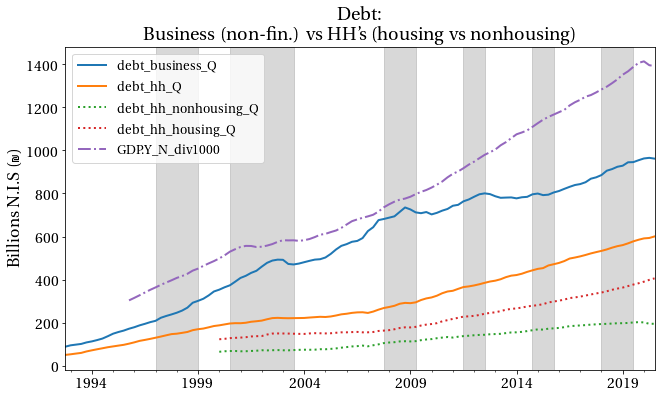

In [21]:
title='Debt: \n Business (non-fin.) vs HH\'s (housing vs nonhousing)'
#ylabel=r' Milions N.I.S'
linestyles = ['-','-',':',':','-.','--','-.','-']

sel_Debt = ['debt_business_Q','debt_hh_Q',
          'debt_hh_nonhousing_Q', 'debt_hh_housing_Q','GDP.Y_N_div1000']
ax= plot1ax(columns=sel_Debt,ylabel=leb_bNIS,df=df_Amount,linestyles=linestyles, markers='',xlabel='',title=title) # \faShekel \faSheqel
add_Rec(ax,df_US,'ISRRECM');   
#multi_save(current_NB_path+'2.0-c-ISR_data_exploreation_21_0_new') # since nbconverter don't save corectly
#plt.tight_layout()
#plt.savefig(current_NB_path+'2.0-c-ISR_data_exploreation_21_0_new.pdf') # since nbconverter don't save corectly

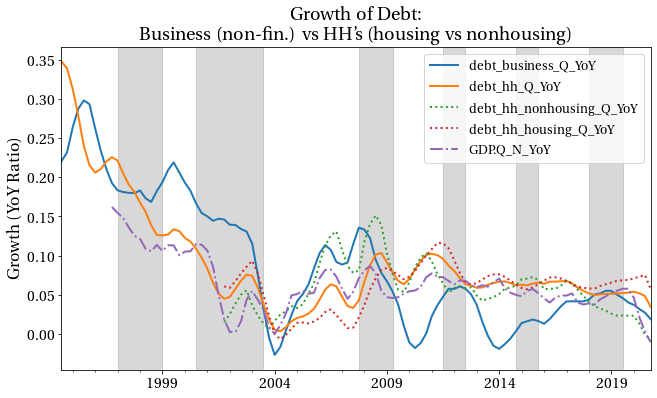

In [22]:
# For Alex Question. may be deleted!
title='Growth of Debt: \n Business (non-fin.) vs HH\'s (housing vs nonhousing)'
sel_Debt = ['debt_business_Q_YoY','debt_hh_Q_YoY',
          'debt_hh_nonhousing_Q_YoY', 'debt_hh_housing_Q_YoY','GDP.Q_N_YoY']
ax= plot1ax(columns=sel_Debt,ylabel=leb_YoY,df=df_Amount,linestyles=linestyles,markers='',xlabel='',title=title) # \faShekel \faSheqel
add_Rec(ax,df_US,'ISRRECM');   
#plt.savefig('toAlex.png')

### Define Leverage as Debt over GDP ratio
\begin{align}
  L_t &= \frac{B_t}{\sum_{\tau=t-3}^{t} Y_\tau}   
\end{align}


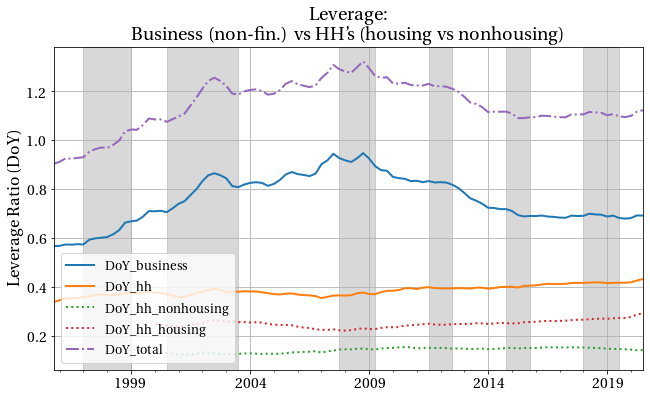

In [23]:
title='Leverage: \n Business (non-fin.) vs HH\'s (housing vs nonhousing)'
sel_DoY = ['DoY_business','DoY_hh',
          'DoY_hh_nonhousing','DoY_hh_housing','DoY_total']
ax= plot1ax(columns=sel_DoY,ylabel=leb_lev,df=df_Amount, linestyles=linestyles, markers='',xlabel='',title=title) # bbox=(1., 0.9)
ax.legend(loc='lower left')
ax.grid()
add_Rec(ax,df_US,'ISRRECM');    

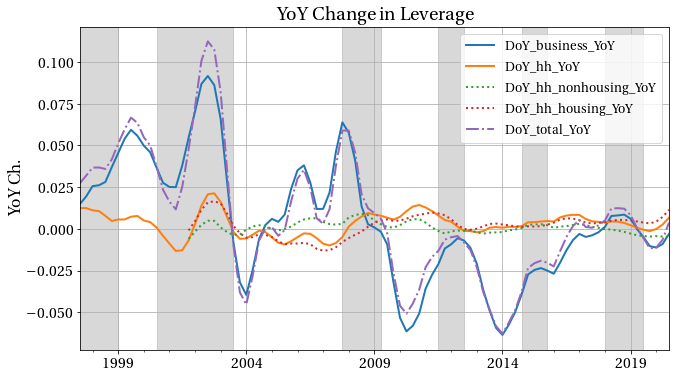

In [24]:
title='YoY Change in Leverage'
sel_DoY_YoY = ['DoY_business_YoY','DoY_hh_YoY',
          'DoY_hh_nonhousing_YoY','DoY_hh_housing_YoY','DoY_total_YoY']
ax= plot1ax(columns=sel_DoY_YoY,ylabel='YoY Ch.',df=df_Amount, linestyles=linestyles, markers='',xlabel='',title=title) # bbox=(1., 0.9)
ax.grid()
add_Rec(ax,df_US,'ISRRECM');    

## Focuse on the HH's Debt and Leverage

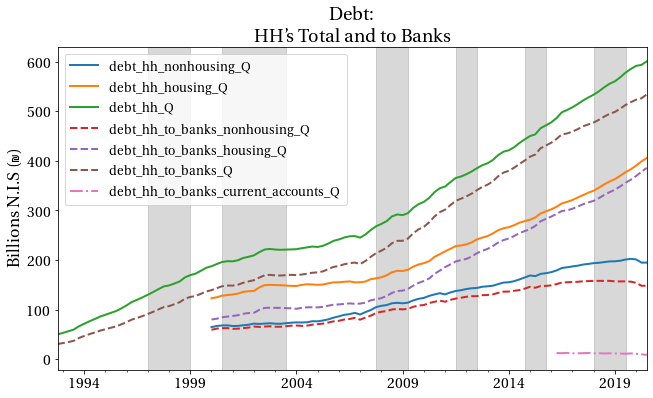

In [25]:
sel_debt_HH = ['debt_hh_nonhousing_Q','debt_hh_housing_Q','debt_hh_Q',
               'debt_hh_to_banks_nonhousing_Q','debt_hh_to_banks_housing_Q','debt_hh_to_banks_Q',
               'debt_hh_to_banks_current_accounts_Q']
linestyles = ['-','-','-','--','--','--','-.']
title='Debt: \n HH\'s Total and to Banks'
ax=plot1ax(columns=sel_debt_HH,ylabel=leb_bNIS,df=df_Amount,linestyles=linestyles,markers='',xlabel='',title=title)
add_Rec(ax,df_US,'ISRRECM');

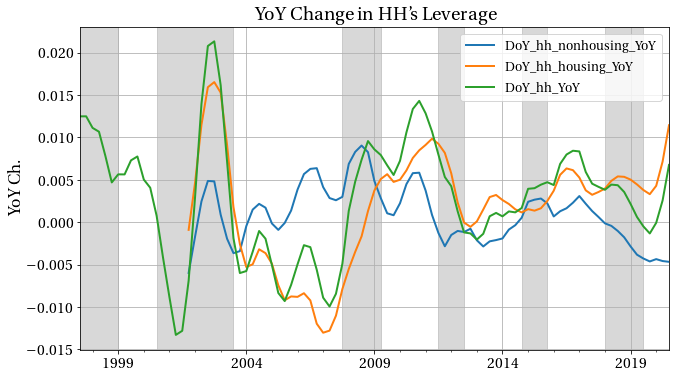

In [26]:
title='YoY Change in HH\'s Leverage'
sel_DoY_YoY = ['DoY_hh_nonhousing_YoY','DoY_hh_housing_YoY','DoY_hh_YoY']
ax= plot1ax(columns=sel_DoY_YoY,ylabel='YoY Ch.',df=df_Amount, linestyles=linestyles, markers='',xlabel='',title=title) # bbox=(1., 0.9)
ax.grid()
add_Rec(ax,df_US,'ISRRECM');    

HH's credit for non-housing from various Sources over time (See also Shami 2019, TAUB center)

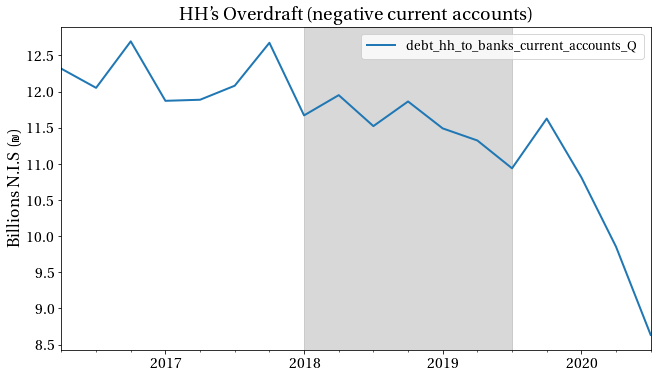

In [27]:
sel_debt_HH = ['debt_hh_to_banks_current_accounts_Q']
linestyles = ['-','-','-','--','--','--','-.']
title='HH\'s Overdraft (negative current accounts)'
ax=plot1ax(columns=sel_debt_HH,ylabel=leb_bNIS,df=df_Amount,linestyles=linestyles,markers='',xlabel='',title=title)
add_Rec(ax,df_US,'ISRRECM');

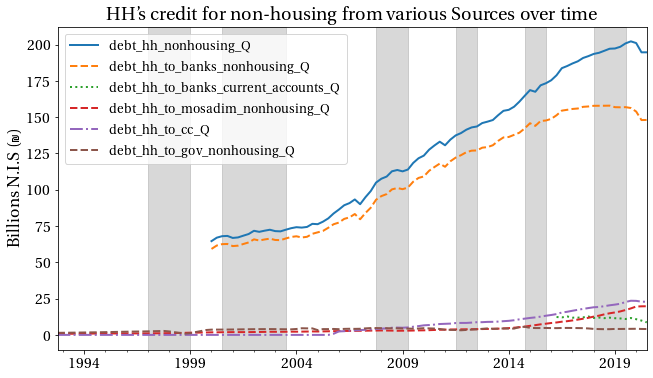

In [28]:
sel_debt_HH = ['debt_hh_nonhousing_Q','debt_hh_to_banks_nonhousing_Q',
                'debt_hh_to_banks_current_accounts_Q',
                'debt_hh_to_mosadim_nonhousing_Q',
                'debt_hh_to_cc_Q',
                'debt_hh_to_gov_nonhousing_Q']
linestyles = ['-','--',':','--','-.','--','-.']
title='HH\'s credit for non-housing from various Sources over time'
ax=plot1ax(columns=sel_debt_HH,ylabel=leb_bNIS,df=df_Amount,linestyles=linestyles,markers='',xlabel='',title=title)
add_Rec(ax,df_US,'ISRRECM');

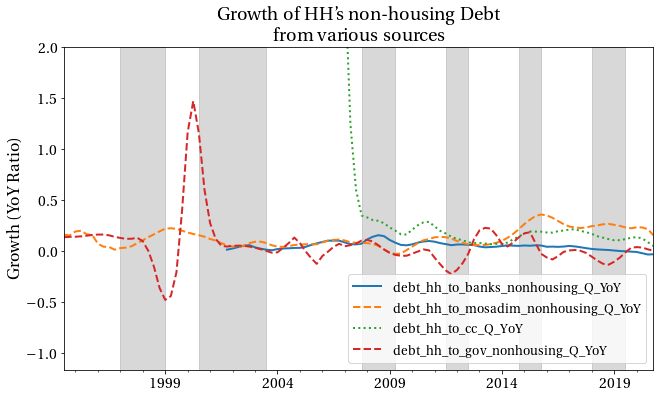

In [29]:
sel  = ['debt_hh_to_banks_nonhousing_Q',
        'debt_hh_to_mosadim_nonhousing_Q',
        'debt_hh_to_cc_Q',
        'debt_hh_to_gov_nonhousing_Q']
for col in sel:
    df_Amount  = ncStat.YoY(col,df_Amount)

sel  = ['debt_hh_to_banks_nonhousing_Q_YoY',
        'debt_hh_to_mosadim_nonhousing_Q_YoY',
        'debt_hh_to_cc_Q_YoY',
        'debt_hh_to_gov_nonhousing_Q_YoY']

title='Growth of HH\'s non-housing Debt \n from various sources'
linestyles = ['-','--',':','--','-.','--','-.']

ax= plot1ax(columns=sel, ylabel=leb_YoY,df=df_Amount,linestyles=linestyles,markers='',xlabel='',title=title) # \faShekel \faSheqel
plt.ylim(top=2)
add_Rec(ax,df_US,'ISRRECM');   

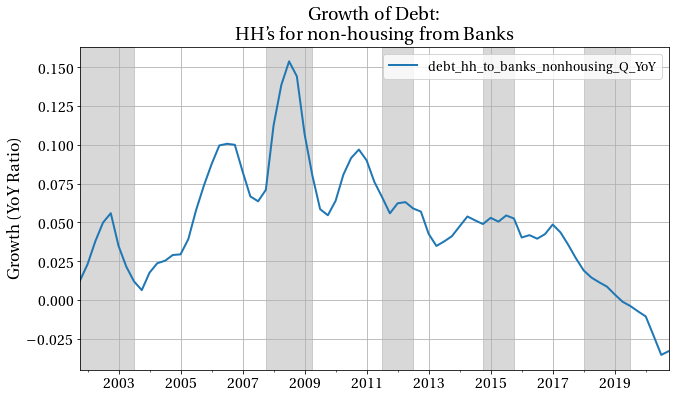

In [30]:
sel  = ['debt_hh_to_banks_nonhousing_Q_YoY'   ]
title='Growth of Debt: \n HH\'s for non-housing from Banks'
linestyles = ['-','--',':','--','-.','--','-.']

ax= plot1ax(columns=sel, ylabel=leb_YoY,df=df_Amount,linestyles=linestyles,markers='',xlabel='',title=title) # \faShekel \faSheqel
#plt.ylim(top=2)
ax.grid()
add_Rec(ax,df_US,'ISRRECM');  

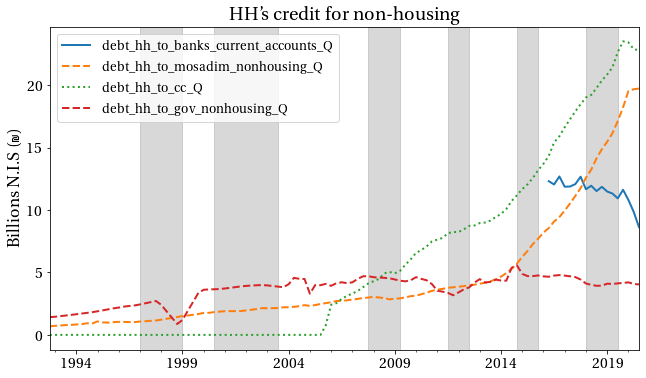

In [31]:
sel_debt_HH = [ 'debt_hh_to_banks_current_accounts_Q',
                'debt_hh_to_mosadim_nonhousing_Q',
                'debt_hh_to_cc_Q',
                'debt_hh_to_gov_nonhousing_Q']
linestyles = ['-','--',':','--','-.','--','-.']
title='HH\'s credit for non-housing'
ax=plot1ax(columns=sel_debt_HH,ylabel=leb_bNIS,df=df_Amount,linestyles=linestyles,markers='',xlabel='',title=title)
add_Rec(ax,df_US,'ISRRECM');

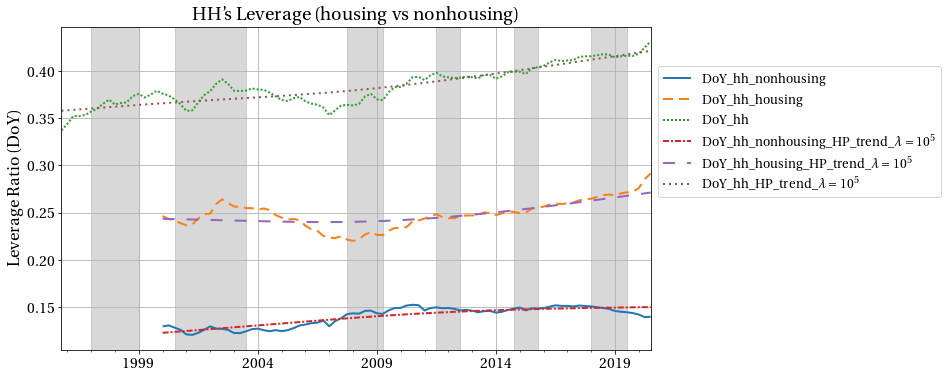

In [32]:
#mask = period(df_Amount.index,start='2018-11-01')
title_hh_lev='HH\'s Leverage (housing vs nonhousing)'
sel_DoY = ['DoY_hh_nonhousing','DoY_hh_housing','DoY_hh']
lamb_pow = 5
lamb = 10**lamb_pow
lamb_str = '_$\lambda=10^'+str(lamb_pow)+'$'    # '_$\lambda=10^4$'
for col in sel_DoY:
    df_Amount[col+'_HP_cycle'+lamb_str],df_Amount[col+'_HP_trend'+lamb_str]=sm.tsa.filters.hpfilter(df_Amount[[col]].dropna(), lamb=lamb)    
sel_DoY_HP = [col+'_HP_trend'+lamb_str for col in sel_DoY]
ax= plot1ax(columns=sel_DoY+sel_DoY_HP,ylabel=leb_lev,df=df_Amount, markers='',xlabel='',title=title_hh_lev,bbox=(1., 0.9))
# linestyles=linestyles
#ax.legend(loc='lower left')
ax.grid()
add_Rec(ax,df_US,'ISRRECM');    

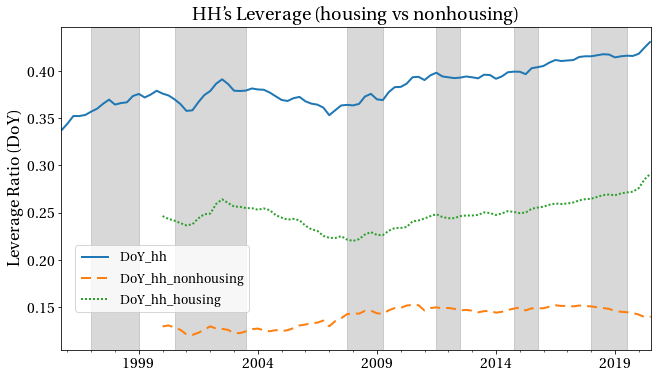

In [33]:
#mask = period(df_Amount.index,start='2018-11-01')
sel_DoY = ['DoY_hh','DoY_hh_nonhousing','DoY_hh_housing']
ax= plot1ax(columns=sel_DoY,df=df_Amount,ylabel=leb_lev, markers='',xlabel='',title=title_hh_lev,bbox=(0.33,0.22))
add_Rec(ax,df_US,'ISRRECM');   

In [34]:
toExport = False
if toExport:
    path = 'reports/toAlex/' 
    df_Amount[sel_DoY].to_excel(path+'toAlex.xlsx')

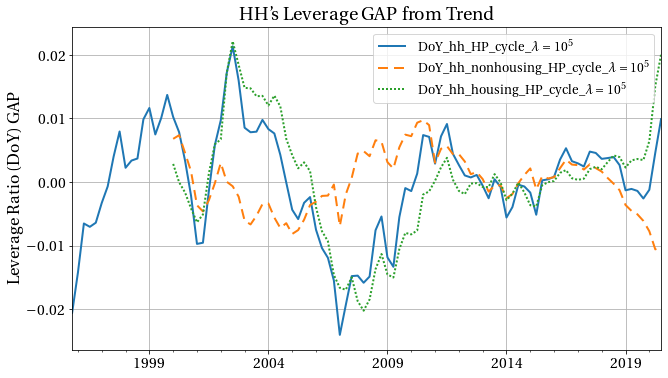

In [35]:
title='HH\'s Leverage GAP from Trend'
sel_DoY_HP_res = [col+'_HP_cycle'+lamb_str for col in sel_DoY]
ax= plot1ax(columns=sel_DoY_HP_res,ylabel=leb_lev+' GAP',df=df_Amount,markers='',xlabel='',title=title)
ax.grid()

### HH's Debt Indexation

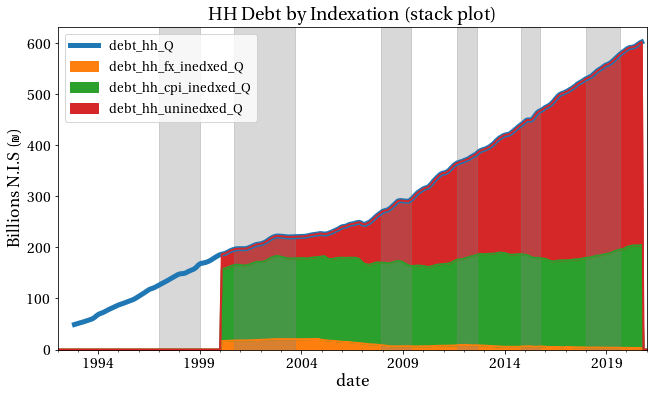

In [36]:
debt_HH_indexation = ['debt_hh_fx_inedxed_Q',
                      'debt_hh_cpi_inedxed_Q',
                      'debt_hh_uninedxed_Q']
ax = df_CreditSeg[['debt_hh_Q']].plot(linewidth=5)
df_CreditSeg[debt_HH_indexation].plot.area(ax=ax)
ax.set_title('HH Debt by Indexation (stack plot)')
ax.set_ylabel(leb_bNIS)
add_Rec(ax,df_US,'ISRRECM');

Note that the indexed Debt is very stable and there is just few new loans each month, hence the price (the indexed interest rate) is not representing the economical situation.

## Business Debt and Leverege

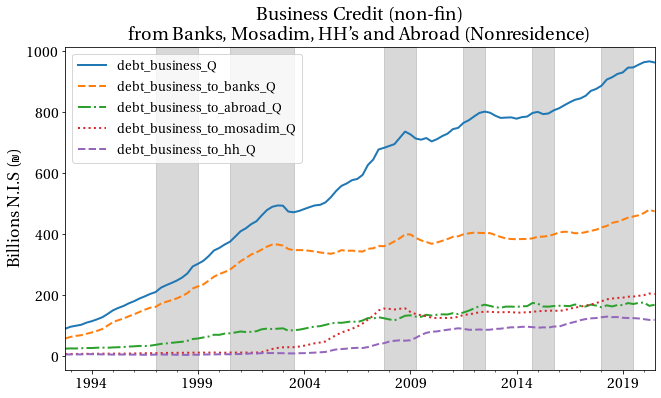

In [37]:
sel_debt_business = ['debt_business_Q', 'debt_business_to_banks_Q', 'debt_business_to_abroad_Q',
                     'debt_business_to_mosadim_Q','debt_business_to_hh_Q'] 
linestyles = ['-','--','-.',':','--','-.']
title='Business Credit (non-fin) \n from Banks, Mosadim, HH\'s and Abroad (Nonresidence)'
ax=plot1ax(columns=sel_debt_business,ylabel=leb_bNIS,df=df_Amount,linestyles=linestyles,markers='',xlabel='',title=title)
add_Rec(ax,df_US,'ISRRECM');

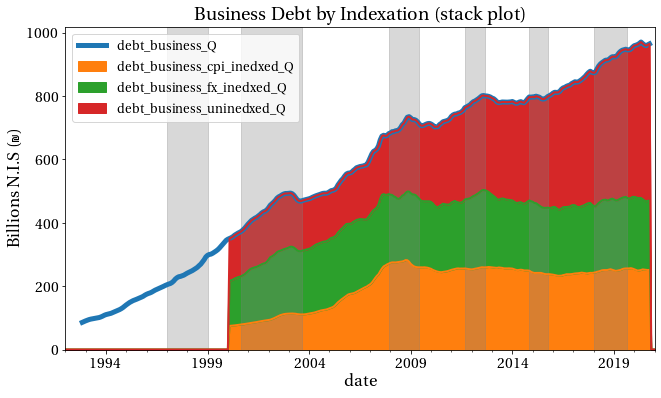

In [38]:
debt_business_indexation = ['debt_business_cpi_inedxed_Q','debt_business_fx_inedxed_Q',
                            'debt_business_uninedxed_Q']
ax = df_CreditSeg[['debt_business_Q']].plot(linewidth=5,ylabel=leb_bNIS)
df_CreditSeg[debt_business_indexation].plot.area(ax=ax)
ax.set_title('Business Debt by Indexation (stack plot)')
add_Rec(ax,df_US,'ISRRECM');

# HH's Credit from Banks - Detailed Data from 2016
Based mostly on the Commercial Banks repots to the BoI Bank Supervision 

In [39]:
path = 'data/raw/Pataya_Credit/' 
file_name = 'Banks_Credit_Detaeild.xlsx'
nrows=7

In [40]:
df_BanksCredit_info = pd.read_excel(path+file_name,sheet_name='גיליון1',index_col=0,header=0,nrows=nrows)

pd.set_option("display.max_rows", None, "display.max_columns", None) 
#pd.set_option("display.max_rows", 50, "display.max_columns", 10)

df_BanksCredit_info = df_BanksCredit_info.transpose()
df_BanksCredit_info.reset_index(inplace=True)
df_BanksCredit_info.set_index('FAMEDATE',inplace=True)
df_BanksCredit_info.rename(columns = {'index':'Description'},inplace=True)
#df_BanksCredit_info[['Description']]

# orginizedd the data
df_BanksCredit_info['proc Description'] = df_BanksCredit_info['Description'].str[5:]
how = ['משקי בית', 'בנקאות פרטית', 'עסקים זעירים','עסקים קטנים','עסקים בינוניים','עסקים בינונייים', 'עסקים גדולים','גופים מוסדיים','תושבי חוץ','סה"כ','שיעור הריבית']
how_eng = ['hh', 'PriveteBanking', 'VerySmall_business','Small_business','Medium_business','Medium_2_business','Large_business','mosadim','abroad','total','IR']
for index,how_col in enumerate(how):
    df_BanksCredit_info[how_eng[index]] = df_BanksCredit_info['proc Description'].str.contains(how_col)
    df_BanksCredit_info['proc Description'] = df_BanksCredit_info['proc Description'].str.replace(how_col,'')
df_BanksCredit_info['test_true'] = df_BanksCredit_info[how_eng].sum(axis='columns')
#df_BanksCredit_info[['a','b','c','d']] = df_BanksCredit_info['Description'].str.split(' ', 3, expand=True)
# df_BanksCredit_info[['a','b','c','d']] = df_BanksCredit_info['Description'].str.split(' ', 3, expand=True)
#df_BanksCredit_info[['proc Description','how','Description']]
df_BanksCredit_info.drop(columns=['יחידות','מקור הנתונים','פעולה','תדירות','מקורי/עונתיות','בסיס מחירים'],inplace=True)

#df_BanksCredit_info[df_BanksCredit_info['hh']][df_BanksCredit_info['IR']]['Description']
#df_BanksCredit_info[how_eng]
#df_BanksCredit_info

In [41]:
#df_BanksCredit_info[['אשראי-לא צמוד-משקי בית-סה"כ משקי בית (ללא הלוואות לדיור)-סה"כ-סכום',
#                    'אשראי-צמוד-משקי בית-סה"כ משקי בית (ללא הלוואות לדיור)-סה"כ-סכום']]

In [42]:
get_cols = ['s285801.m_99010','s285802.m_99010','s285800.m_99010','s285744.m_99010',
            's285745.m_99010','s286241.m_99010','s286240.m_99010','s286631.m_99010','s286630.m_99010']
get_cols_short = [el.split('.')[0] for el in get_cols]
df_interesting_col = df_BanksCredit_info.loc[get_cols,['Description']]
interesting_col = list(df_interesting_col['Description'])
#interesting_col

In [43]:
#- s285801: הריבית על אשראי חדש שניתן למשקי בית (ללא הלוואות לדיור וללא בנקאות פרטית) במגזר השקלי הלא צמוד
#- s285802: תקופת פירעון סופי של אשראי חדש במגזר השקלי הלא צמוד, משקי בית (ללא הלוואות לדיור וללא בנקאות פרטית) (שנים)
#- s285800: האשראי שניתן במגזר השקלי הלא צמוד למשקי בית (ללא הלוואות לדיור) (מיליארדי ש"ח)
#- s285744: שיעור הריבית של אשראי חדש שניתן למשקי בית (ללא הלוואות לדיור וללא בנקאות פרטית)- הלוואות עד 3 חודשים, לא צמודות בריבית קבועה
#- s285745 :תקופת פירעון סופי של אשראי חדש שניתן למשקי בית (ללא הלוואות לדיור וללא בנקאות פרטית)- הלוואות עד 3 חודשים, לא צמודות בריבית קבועה (שנים)
#- s286241: "הריבית על אשראי חדש שניתן למשקי בית (ללא הלוואות לדיור) במגזר צמוד מדד"
#- s286240: האשראי שניתן במגזר צמוד מדד למשקי בית (ללא הלוואות לדיור) (מיליוני ש"ח)
#- s286631: "הריבית על אשראי חדש שניתן למשקי בית (ללא הלוואות לדיור) במגזר צמוד ונקוב מט""ח"
#- s286630: האשראי שניתן במגזר צמוד ונקוב מט"ח למשקי בית (ללא הלוואות לדיור) (מיליארדי ש"ח)
#- s285800 + s286240 + s286630 : האשראי החדש שניתן למשקי בית שלא לדיור, בכל סוגי ההצמדה (מיליארדי ש"ח)                                                 

In [44]:
# Get Bank Credit Data
df_BanksCredit = pd.read_excel(path+file_name,sheet_name='גיליון1',index_col=0,header=0,skiprows=list(range(1,8)))
df_BanksCredit.index.name = 'date'
#df_BanksCredit.head(5)

In [45]:
df_BanksCredit['IR_hh_NonHousing_uninedxed'] = df_BanksCredit['אשראי-לא צמוד-משקי בית-סה"כ משקי בית (ללא הלוואות לדיור)-סה"כ-שיעור הריבית']
df_BanksCredit['Maturity_hh_NonHousing_uninedxed'] = df_BanksCredit['אשראי-לא צמוד-משקי בית-סה"כ משקי בית (ללא הלוואות לדיור)-סה"כ-תקופת פירעון סופית']
df_BanksCredit['debt_new_issue_hh_NonHousing_uninedxed'] = df_BanksCredit['אשראי-לא צמוד-משקי בית-סה"כ משקי בית (ללא הלוואות לדיור)-סה"כ-סכום']/1000   # from Thousends to Milions   9/2020: 3,163,256.1
df_BanksCredit['IR_hh_VeryShort_uninedxed'] = df_BanksCredit['אשראי-לא צמוד-משקי בית-עד 3 חודשים-ריבית קבועה-שיעור הריבית']
df_BanksCredit['Maturity_hh_VeryShort_uninedxed'] = df_BanksCredit['אשראי-לא צמוד-משקי בית-עד 3 חודשים-ריבית קבועה-תקופת פירעון סופית']
df_BanksCredit['IR_hh_NonHousing_inedxed'] = df_BanksCredit['אשראי-צמוד-משקי בית-סה"כ משקי בית (ללא הלוואות לדיור)-סה"כ-שיעור הריבית']
df_BanksCredit['debt_new_issue_hh_NonHousing_inedxed'] = df_BanksCredit['אשראי-צמוד-משקי בית-סה"כ משקי בית (ללא הלוואות לדיור)-סה"כ-סכום']/1000   # from Thousends to Milions 9/2020:  13,226.0

df_BanksCredit['IR_hh_NonHousing_FXinedxed'] = df_BanksCredit['אשראי-צמוד מט"ח-משקי בית-סה"כ משקי בית (ללא הלוואות בדיור)-סה"כ-שיעור הריבית']
df_BanksCredit['debt_new_issue_hh_NonHousing_FXinedxed'] = df_BanksCredit['אשראי-צמוד מט"ח-משקי בית-סה"כ משקי בית (ללא הלוואות בדיור)-סה"כ-סכום']/1000   # from Thousends to Milions 9/2020: 3,982.0

trans= {'אשראי-צמוד-משקי בית-מעל 3 חודשים ועד שנה-ריבית קבועה-שיעור הריבית':'IR_hh_indexed_3m_1y',
#                'אשראי-צמוד-משקי בית-מעל 3 חודשים ועד שנה-סה"כ-שיעור הריבית':'IR_hh_indexed_3m_1y_tot', 
                'אשראי-לא צמוד-משקי בית-מעל 3 חודשים ועד שנה-ריבית קבועה-שיעור הריבית':'IR_hh_unindexed_3m_1y',
#                'אשראי-לא צמוד-משקי בית-מעל 3 חודשים ועד שנה-סה"כ-שיעור הריבית':'IR_hh_unindexed_3m_1y_tot',
#                'אשראי שמוחזר-משקי בית -מעל 3 חודשים ועד שנה-לא צמוד-שיעור הריבית':'IR_hh_unindexed_3m_1y_recycle',
#                'אשראי שמוחזר-משקי בית -מעל 3 חודשים ועד שנה-צמוד מדד-שיעור הריבית':'IR_hh_indexed_3m_1y_recycle',
                'אשראי שמוחזר-משקי בית -מעל 3 חודשים ועד שנה-לא צמוד-שיעור הריבית.2':'IR_hh_unindexed_3m_1y_recycle_B',
#                'אשראי שמוחזר-משקי בית -מעל 3 חודשים ועד שנה-צמוד מדד-שיעור הריבית.2':'IR_hh_indexed_3m_1y_recycle_B',
#                'אשראי שחודש-משקי בית -מעל 3 חודשים ועד שנה-לא צמוד-שיעור הריבית':'IR_hh_unindexed_3m_1y_renew',
#                'אשראי שחודש-משקי בית -מעל 3 חודשים ועד שנה-צמוד מדד-שיעור הריבית':'IR_hh_indexed_3m_1y_renew'
        }
df_BanksCredit.rename(columns=trans,inplace=True)
cols_more_IRs = list(trans.values())

In [46]:
cols_IR = ['IR_hh_NonHousing_uninedxed','IR_hh_VeryShort_uninedxed',
          'IR_hh_NonHousing_inedxed','IR_hh_NonHousing_FXinedxed']
cols_Credit = ['debt_new_issue_hh_NonHousing_uninedxed','debt_new_issue_hh_NonHousing_inedxed','debt_new_issue_hh_NonHousing_FXinedxed'] 
cols_Maturity = ['Maturity_hh_NonHousing_uninedxed','Maturity_hh_VeryShort_uninedxed']

# Movind data from Montly TO Quartirly!
for col in cols_Credit:
    df_BanksCredit[col+'_Q'] = df_BanksCredit[col].rolling(window=3).sum()
for col in cols_IR+cols_Maturity+cols_more_IRs:
    df_BanksCredit[col+'_Q'] = df_BanksCredit[col].rolling(window=3).mean()

cols_IR_Q = [el+'_Q' for el in cols_IR]
cols_more_IRs_Q = [el+'_Q' for el in cols_more_IRs]
cols_Credit_Q = [el+'_Q' for el in cols_Credit]
cols_Maturity_Q = [el+'_Q' for el in cols_Maturity]


In [47]:
# Calculate Leverage Ratio
#df_BanksCredit['DoY_hh_NonHousing_uninedxed'] = df_BanksCredit['Debt_hh_NonHousing_uninedxed_Q'] / df_Amount['GDP.Y_N_div1000']
#df_BanksCredit['DoY_hh_NonHousing_inedxed'] = df_BanksCredit['Debt_hh_NonHousing_inedxed_Q'] / df_Amount['GDP.Y_N_div1000']
#df_BanksCredit['DoY_hh_NonHousing_FXinedxed'] = df_BanksCredit['Debt_hh_NonHousing_FXinedxed_Q'] / df_Amount['GDP.Y_N_div1000']

In [48]:
# Calculate YoY Changes
#df_BanksCredit  = ncStat.YoY('Debt_hh_NonHousing_uninedxed_Q',df_BanksCredit)
#df_BanksCredit  = ncStat.YoY('Debt_hh_NonHousing_inedxed_Q',df_BanksCredit)
#df_BanksCredit  = ncStat.YoY('Debt_hh_NonHousing_FXinedxed_Q',df_BanksCredit)

#df_BanksCredit  = ncStat.YoY('DoY_hh_NonHousing_uninedxed',df_BanksCredit,calc_type='Ratio')
#df_BanksCredit  = ncStat.YoY('DoY_hh_NonHousing_inedxed',df_BanksCredit,calc_type='Ratio')
#df_BanksCredit  = ncStat.YoY('DoY_hh_NonHousing_FXinedxed',df_BanksCredit,calc_type='Ratio')

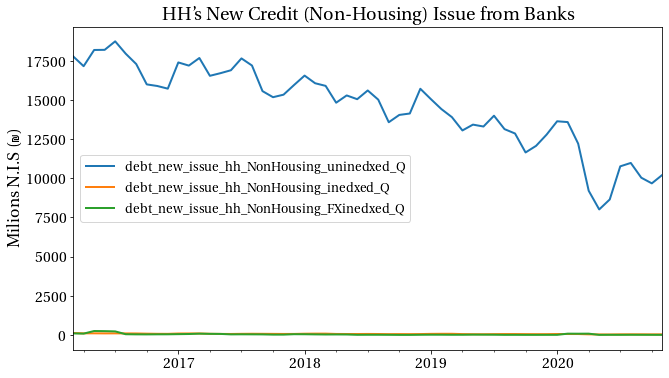

In [49]:
linestyles = ['-','-','-','--','--','--','-.']
title='HH\'s New Credit (Non-Housing) Issue from Banks'
ax=plot1ax(columns=cols_Credit_Q,ylabel=leb_mNIS,df=df_BanksCredit,linestyles=linestyles,markers='',xlabel='',title=title);

In [50]:
pd.options.display.latex.repr=True
mask = period(df_BanksCredit.index,start='2020-01-01')
df_BanksCredit.loc[mask,cols_IR_Q]

IR_hh_NonHousing_uninedxed_Q  IR_hh_VeryShort_uninedxed_Q  \
date                                                                    
2020-01-31                          5.58                         6.46   
2020-02-29                          5.55                         6.44   
2020-03-31                          5.60                         7.20   
2020-04-30                          5.59                         6.99   
2020-05-31                          5.47                         6.65   
2020-06-30                          5.35                         6.14   
2020-07-31                          5.21                         6.01   
2020-08-31                          5.10                         5.71   
2020-09-30                          5.04                         5.49   
2020-10-31                          5.06                         5.38   
2020-11-30                          5.09                         5.67   
2020-12-31                           NaN                          NaN   

            IR_hh_NonHousing_inedxed_Q  IR_hh_NonHousing_FXinedxed_Q  
date                                                                  
2020-01-31                        0.55                          3.69  
2020-02-29                        0.50                          2.73  
2020-03-31                        0.45                          2.91  
2020-04-30                        0.53                          2.12  
2020-05-31                        0.60                          3.08  
2020-06-30                        0.53                          3.49  
2020-07-31                        0.51                          3.69  
2020-08-31                        0.48                          3.44  
2020-09-30                        0.46                          2.60  
2020-10-31                        0.45                          2.68  
2020-11-30                        0.44                          2.97  
2020-12-31                         NaN                           NaN

In [51]:
pd.options.display.latex.repr=False

In [52]:
cols_more_IRs_Q

['IR_hh_indexed_3m_1y_Q',
 'IR_hh_unindexed_3m_1y_Q',
 'IR_hh_unindexed_3m_1y_recycle_B_Q']

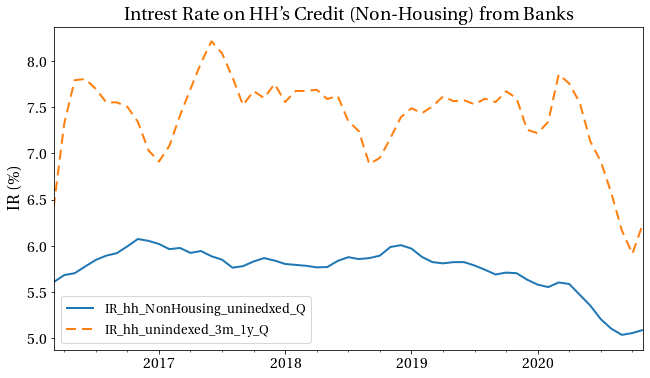

In [53]:
col_to_plot_fromBanks =['IR_hh_NonHousing_uninedxed_Q','IR_hh_unindexed_3m_1y_Q']
#ax1 = df_BanksCredit[cols_IR].dropna().plot()#
linestyles = ['-','--','-.',':','--','-.']
title='Intrest Rate on HH\'s Credit (Non-Housing) from Banks'
ax=plot1ax(columns=col_to_plot_fromBanks,ylabel='IR (\%)',df=df_BanksCredit,markers='',xlabel='',title=title)
ax.legend(loc='lower left');

Note that the indexed Debt is very stable and there is just few new loans each month, hence the price (the indexed interest rate) is not representing the economical situation.

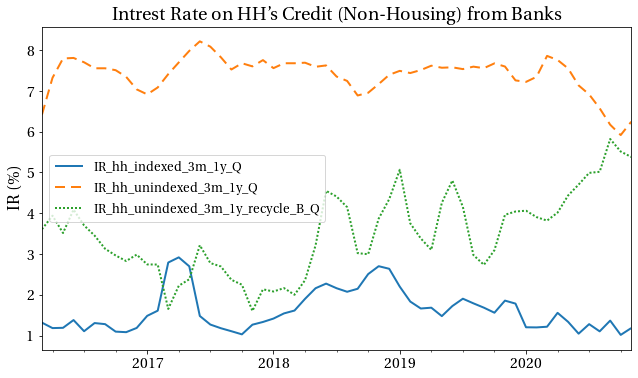

In [54]:
title='Intrest Rate on HH\'s Credit (Non-Housing) from Banks'
ax=plot1ax(columns=cols_more_IRs_Q,ylabel='IR (\%)',df=df_BanksCredit,markers='',xlabel='',title=title)
#df_BanksCredit[cols_more_IRs_Q].dropna().plot()

I think there is problem in data above $\uparrow$, so need to ask Statistic Devision!

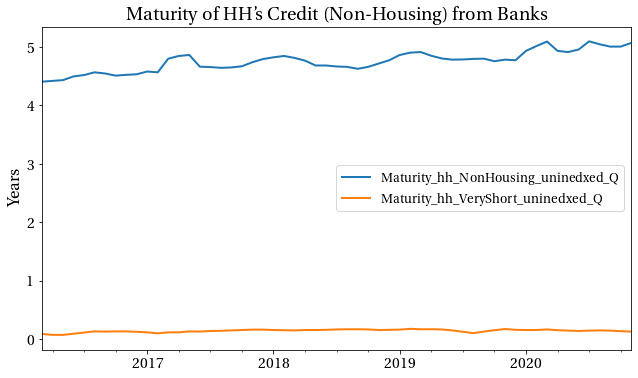

In [55]:
linestyles = ['-','-','-','--','--','--','-.']
title='Maturity of HH\'s Credit (Non-Housing) from Banks'
ax=plot1ax(columns=cols_Maturity_Q,ylabel='Years',df=df_BanksCredit,linestyles=linestyles,markers='',xlabel='',title=title)

# Intrest Rates

In [56]:
path = 'data/raw/Pataya_Credit/' 
file_name = 'Monetary_FinMarket_n_Rates.xlsx'
nrows=7
df_IRs_info = pd.read_excel(path+file_name,sheet_name='גיליון1',index_col=0,header=0,nrows=nrows)
#df_IRs_info

In [57]:
df_IRs = pd.read_excel(path+file_name,sheet_name='גיליון1',index_col=0,header=0,skiprows=list(range(1,8)))
df_IRs.index.name = 'date'
#df_IRs

In [58]:
col_dict =  {'עו"ש וחח"ד ביתרת חובה':'ir_Overdraft',
             'ריבית משוקללת על אשראי למשקי בית שלא לדיור, לעסקים זעירים וקטנים – מט"י לא צמוד – בריבית קבועה – עד 3 חודשים':'ir_hh_3m',
             'ריבית בנק ישראל - ממוצע חודשי':'ir_BoI',
             'ריבית בנק ישראל (אפקטיבית) - ממוצע חודשי':'ir_BoI2',
             'שיעור ריבית על אשראי שניתן למטרת מגורים - צמוד מדד - ריבית קבועה ':'Mortgage fixed real rate',
             'שיעור ריבית על אשראי שניתן למטרת מגורים - צמוד מדד - ריבית משתנה ':'Mortgage floating real rate',
             'שיעור ריבית על אשראי שניתן למטרת מגורים - לא צמוד - ריבית קבועה':'Mortgage fixed nominal rate',
             'שיעור ריבית על אשראי שניתן למטרת מגורים - לא צמוד - ריבית משתנה ':'Mortgage floating nominal rate',
             'שיעור ריבית על אשראי שניתן למטרת מגורים - מט"ח וצמוד מט"ח - ריבית קבועה':'Mortgage fixed foreign rate',
             'שיעור ריבית על אשראי שניתן למטרת מגורים - מט"ח וצמוד מט"ח - ריבית משתנה ':'Mortgage floating foreign rate',
             'תשואה נומינלית מעקום אפס לשנה':'nominal 1Y rate',
             'תשואה נומינלית מעקום אפס לשנתיים':'nominal 2Y rate'
            }
df_IRs.rename(columns = col_dict, inplace=True)

df_IRs['Spread Mortgage'] = df_IRs['Mortgage floating nominal rate'] - df_IRs['ir_BoI']
df_IRs['Spread 3m HH'] = df_IRs['ir_hh_3m'] - df_IRs['ir_BoI']
df_IRs['Spread Overdraft'] = df_IRs['ir_Overdraft'] - df_IRs['ir_BoI']
df_IRs['Borrowers IR (BER model)'] = df_IRs['Spread Overdraft'] \
                                        - df_IRs['Spread Overdraft'].mean() \
                                        + df_IRs['ir_BoI']
selected = ['ir_Overdraft', 'ir_hh_3m', 'ir_BoI', 'ir_BoI2','Mortgage floating nominal rate',
            'Spread Mortgage','Spread 3m HH','Spread Overdraft','Borrowers IR (BER model)']
for col in selected:
    df_IRs[col+'_Q'] = df_IRs[col].rolling(window=3,center=True).mean()

In [59]:
df_ISR = pd.merge(df_Amount,df_IRs,how='inner',left_index=True, right_index=True)
df_ISR['const'] = 1

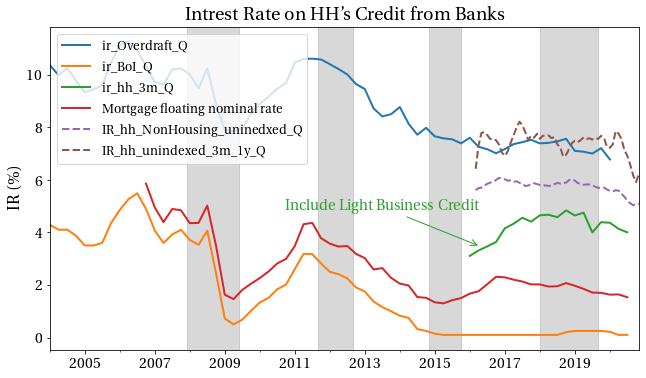

In [116]:
toPlot = ['ir_Overdraft_Q','ir_BoI_Q','ir_hh_3m_Q','Mortgage floating nominal rate']
#cols_IR = ['IR_HH_NonHousing_uninedxed', 'IR_HH_VeryShort_uninedxed' , 'IR_HH_NonHousing_inedxed' , 'IR_HH_NonHousing_FXinedxed'
#mask = period(df_ISR.index,start='1995-01-01')
mask = period(df_ISR.index,start='2004-01-01')

linestyles = ['--','--','-.',':','--','-.']
title='Intrest Rate on HH\'s Credit from Banks'
ax = df_ISR.loc[mask,toPlot].plot()
plot1ax(ax=ax,columns=col_to_plot_fromBanks,ylabel='IR (\%)',df=df_BanksCredit,linestyles=linestyles,markers='',xlabel='',title=title)
ax.annotate('Include Light Business Credit',xycoords ='axes fraction', xy=(0.73, 0.32), xytext=(0.4, 0.43),color='tab:green',arrowprops=dict(arrowstyle='->', color='tab:green'  ))  
plt.legend(loc='upper left')
add_Rec(ax,df_US,'ISRRECM');

In [109]:
tel = {'jack': 4098, 'sape': 4139}
tel['bb'] = 22
tel['jack'] = 44
tel

{'jack': 44, 'sape': 4139, 'bb': 22}

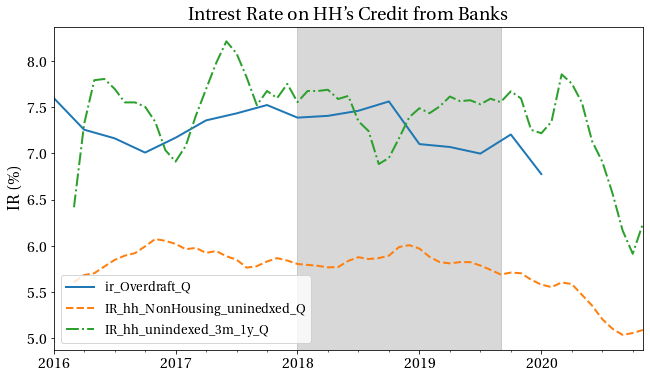

In [113]:
toPlot = ['ir_Overdraft_Q']
cols_IR = ['IR_HH_NonHousing_uninedxed'] 
# 'IR_HH_VeryShort_uninedxed' , 'IR_HH_NonHousing_inedxed' , 'IR_HH_NonHousing_FXinedxed'
#mask = period(df_ISR.index,start='1995-01-01')
mask = period(df_ISR.index,start='2016-01-01')

linestyles = ['--','-.',':','--','-.']
title='Intrest Rate on HH\'s Credit from Banks'
ax = df_ISR.loc[mask,toPlot].plot()
plot1ax(ax=ax,columns=col_to_plot_fromBanks,ylabel='IR (\%)',df=df_BanksCredit,linestyles=linestyles,markers='',xlabel='',title=title)
plt.legend(loc='lower left')
add_Rec(ax,df_US,'ISRRECM');

HH 3m IR Quarterly is Non-Housing, Uninedxed, for HH\'s and Small Business. So it is a Mix!!

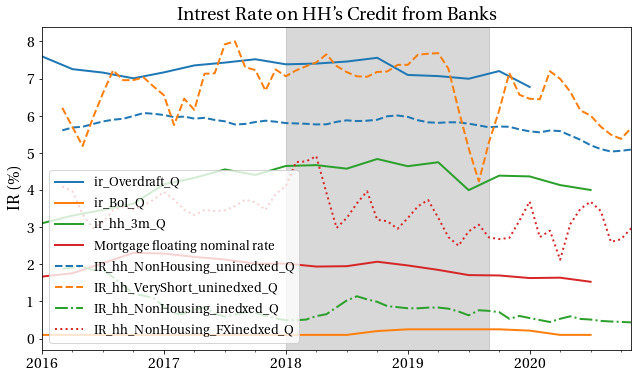

In [61]:
mask = period(df_ISR.index,start='2016-01-01')
ax = df_ISR.loc[mask,toPlot].plot()
plot1ax(ax=ax,columns=cols_IR_Q,ylabel='IR (\%)',df=df_BanksCredit,linestyles=linestyles,markers='',xlabel='',title=title)
ax.legend(loc='lower left')
add_Rec(ax,df_US,'ISRRECM');

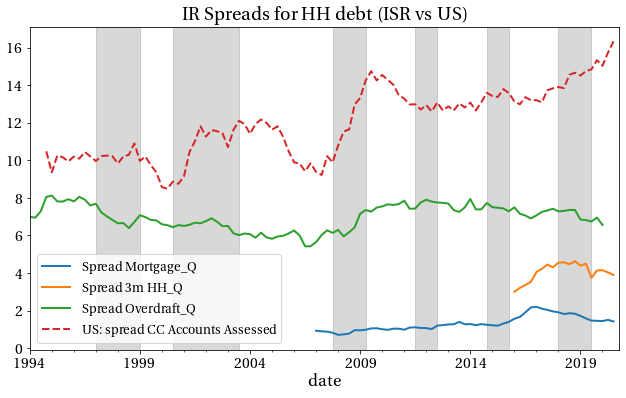

In [62]:
Israel_Spread = ['Spread Mortgage_Q','Spread 3m HH_Q', 'Spread Overdraft_Q']
mask = period(df_ISR.index,start='1994-01-01')
ax = df_ISR.loc[mask,Israel_Spread].plot()
df_US['spread CC Accounts Assessed'].dropna().plot(ax=ax,label='US: spread CC Accounts Assessed',linestyle='--')
plt.title('IR Spreads for HH debt (ISR vs US)')
add_Rec(ax,df_US,'ISRRECM')
plt.legend();

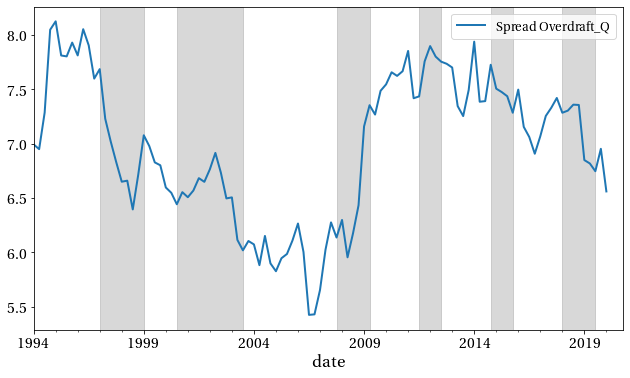

In [63]:
mask = period(df_ISR.index,start='1994-01-01')
ax=df_ISR.loc[mask,['Spread Overdraft_Q']].plot()
add_Rec(ax,df_US,'ISRRECM');

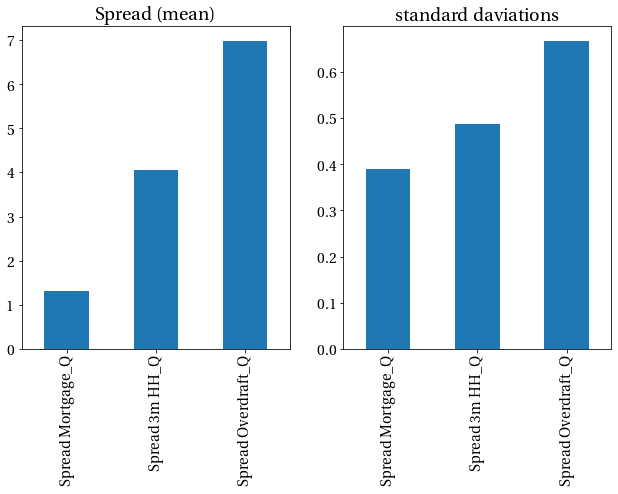

In [64]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
df_ISR.loc[mask,Israel_Spread].mean().plot.bar(ax=ax1)
ax1.set(title='Spread (mean)')
df_ISR.loc[mask,Israel_Spread].std().plot.bar(stacked=True,ax=ax2)
ax2.set(title='standard daviations');

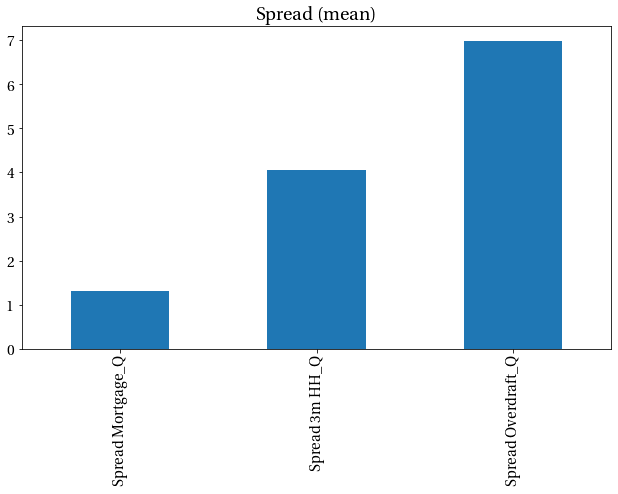

In [65]:
ax1 = df_ISR.loc[mask,Israel_Spread].mean().plot.bar()
ax1.set(title='Spread (mean)');

In [66]:
#list(df_Amount.columns)

## HH's Leverage and Overdraft Spread
as the HH's have higher leverage they are risker and they probabliy have more demand for credit, and this is maybe true also for the demand of overdraft

### HH's Nonhousing Leverage and Overdraft Spread

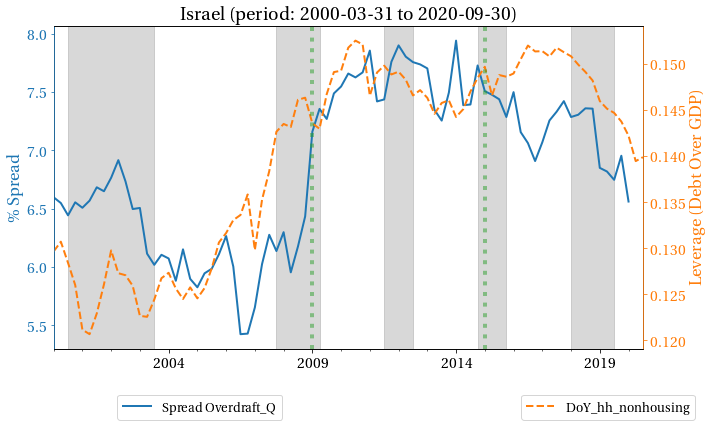

In [67]:
#with plt.xkcd():
if True:
    col1=['Spread Overdraft_Q']
    col2=['DoY_hh_nonhousing']
    start = str(df_ISR[col2].dropna().index[0].date())    
    end = str(df_ISR[col2].dropna().index[-1].date())    
    mask = period(df_ISR.index,start=start)#start = '2015-02-01'    

    ax1,ax2 = plot2axs(columns1=col1,columns2=col2,
                       ylabel1 ='\% Spread', ylabel2='Leverage (Debt Over GDP)',
                       df=df_ISR.loc[mask,col1+col2],
                       markers=['',''],linestyles=['-','--'],
                       bbox1=(0.4, -0.12),bbox2=(1.1, -0.12))    
    add_Rec(ax1,df_US,'ISRRECM')
    ax2.set_title('Israel (period: '+start+' to '+end+')')    
    ax2.axvline(x='2009-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)
    ax2.axvline(x='2015-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)

### HH's Nonhousing Leverage Gap from Trend and Overdraft Spread
**This is the best Graph, where we see three periods of common movments**

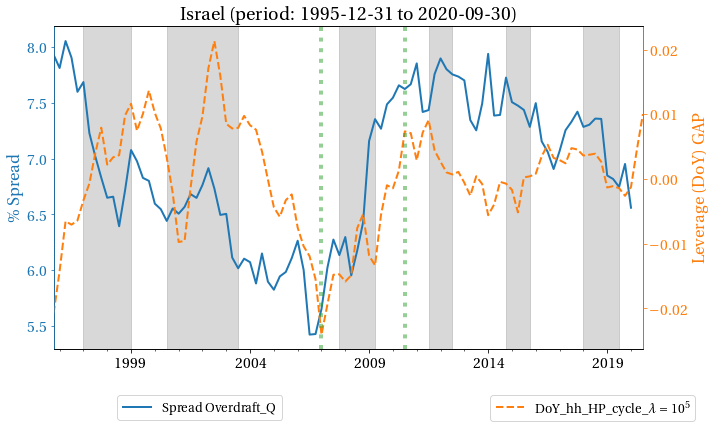

In [68]:
col1=['Spread Overdraft_Q']
col2 = [sel_DoY_HP_res[0]]
start = str(df_ISR[col2].dropna().index[0].date())    
end = str(df_ISR[col2].dropna().index[-1].date())    
mask = period(df_ISR.index,start=start)#start = '2015-02-01'

ax1,ax2 = plot2axs(columns1=col1,columns2=col2,
                    ylabel1 ='\% Spread', ylabel2='Leverage (DoY) GAP',
                    df=df_ISR.loc[mask,col1+col2],
                    markers=['',''],linestyles=['-','--'],
                    bbox1=(0.4, -0.12),bbox2=(1.1, -0.12))    
add_Rec(ax1,df_US,'ISRRECM')
ax2.set_title('Israel (period: '+start+' to '+end+')')    
ax2.axvline(x='2007-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)
ax2.axvline(x='2010-09-30' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5);

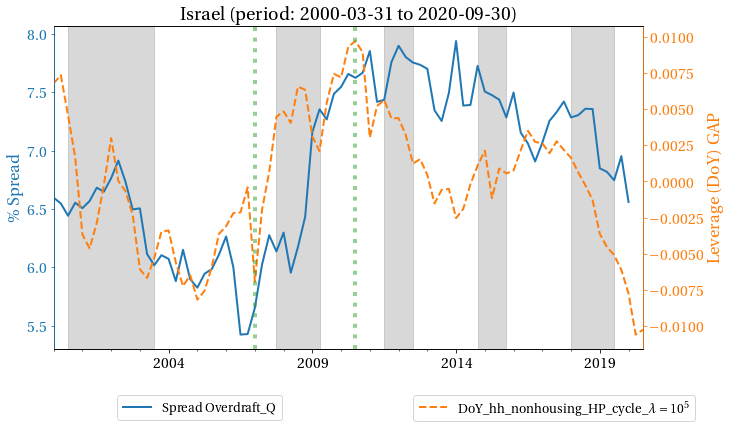

In [69]:
col1=['Spread Overdraft_Q']
col2 = [sel_DoY_HP_res[1]]
start = str(df_ISR[col2].dropna().index[0].date())    
end = str(df_ISR[col2].dropna().index[-1].date())    
mask = period(df_ISR.index,start=start)#start = '2015-02-01'

ax1,ax2 = plot2axs(columns1=col1,columns2=col2,
                    ylabel1 ='\% Spread', ylabel2='Leverage (DoY) GAP',
                    df=df_ISR.loc[mask,col1+col2],
                    markers=['',''],linestyles=['-','--'],
                    bbox1=(0.4, -0.12),bbox2=(1.1, -0.12))    
add_Rec(ax1,df_US,'ISRRECM')
ax2.set_title('Israel (period: '+start+' to '+end+')')    
ax2.axvline(x='2007-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)
ax2.axvline(x='2010-09-30' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5);

### HH's Total Leverage and Overdraft Spread

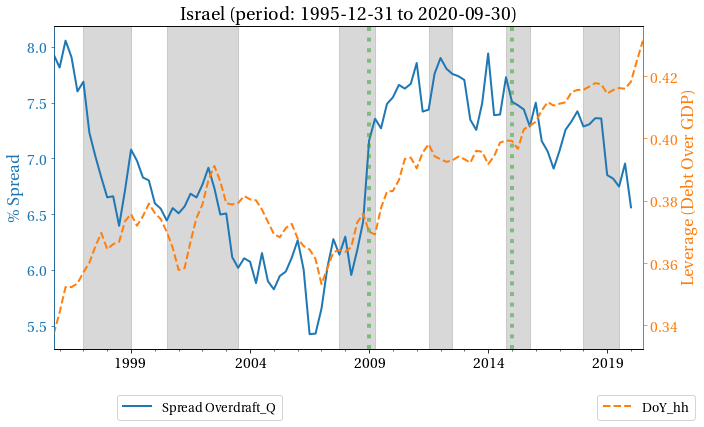

In [70]:
#with plt.xkcd():
if True:
    col1=['Spread Overdraft_Q']
    col2=['DoY_hh']

    start = str(df_ISR[col2].dropna().index[0].date())    
    end = str(df_ISR[col2[0]].dropna().index[-1].date())    
    mask = period(df_ISR.index,start=start)#start = '2015-02-01'    

    ax1,ax2 = plot2axs(columns1=col1,columns2=col2,
                       ylabel1 ='\% Spread', ylabel2='Leverage (Debt Over GDP)',
                       df=df_ISR.loc[mask,col1+col2],
                       markers=['',''],linestyles=['-','--'],
                       bbox1=(0.4, -0.12),bbox2=(1.1, -0.12))    
    add_Rec(ax1,df_US,'ISRRECM')
    ax2.set_title('Israel (period: '+start+' to '+end+')')    
    ax2.axvline(x='2009-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)
    ax2.axvline(x='2015-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)

### HH's Total Leverage Gap from Trend and Overdraft Spread

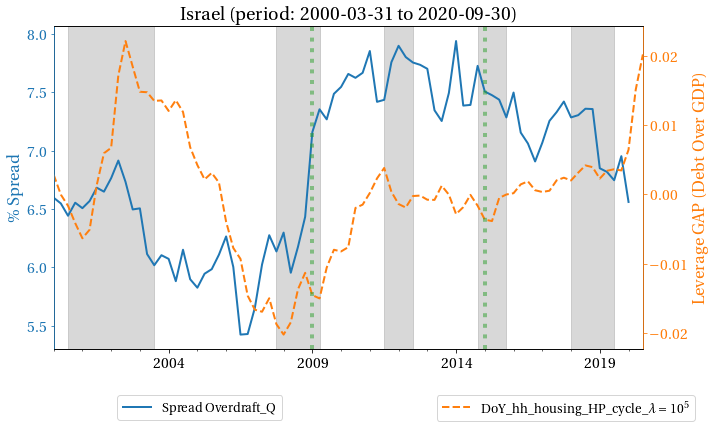

In [71]:
col1=['Spread Overdraft_Q']
col2 = [sel_DoY_HP_res[2]]
start = str(df_ISR[col2].dropna().index[0].date())    
end = str(df_ISR[col2].dropna().index[-1].date())    
mask = period(df_ISR.index,start=start)#start = '2015-02-01'

ax1,ax2 = plot2axs(columns1=col1,columns2=col2,
                    ylabel1 ='\% Spread', ylabel2='Leverage GAP (Debt Over GDP)',
                    df=df_ISR.loc[mask,col1+col2],
                    markers=['',''],linestyles=['-','--'],
                    bbox1=(0.4, -0.12),bbox2=(1.1, -0.12))    
add_Rec(ax1,df_US,'ISRRECM')
ax2.set_title('Israel (period: '+start+' to '+end+')')    
ax2.axvline(x='2009-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)
ax2.axvline(x='2015-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)

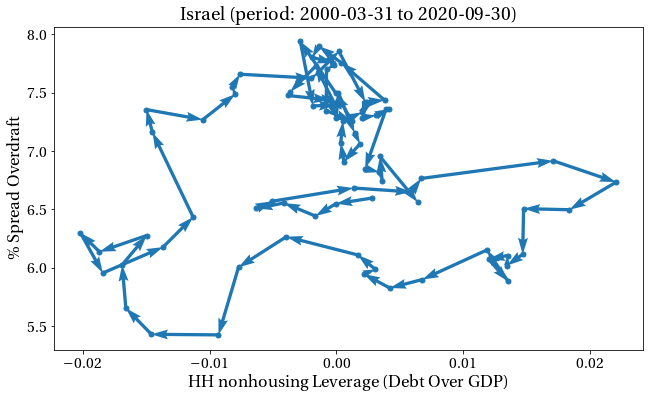

In [72]:
ax = ncPlot.path_in2D(columnX =col2[0], columnY=col1[0],  df=df_ISR, ylabel ='\% Spread Overdraft', xlabel='HH nonhousing Leverage (Debt Over GDP)',marker='.')
ax.set_title('Israel (period: '+start+' to '+end+')'); 

### Export Files

In [73]:
toExport = ['GDP','GDP SA','debt_households_nonhousing_total',
                        'HH Debt to GDP','HH Debt to prox GDP','HH Debt to Consumption',
                        'Overdraft IR Quarterly','BoI IR Quarterly',
                        'Spread Overdraft Quarterly','Borrowers IR (BER model) Quarterly']

In [74]:
path = 'data/processed/' 
df_ISR.to_csv(path+'ISR_data.csv')
df_BanksCredit.to_csv(path+'ISR_Banks_data.csv')

In [8]:
%%capture

# Should unmark the seting: "Jupyter: Theme Matplotlib Plots"
# and rerun notebook...
# must Save Notebook before this

#stop - also commant this  

os.chdir(current_NB_path)
###################################################
### IMPORTENT : update Notebook file_name below ###
###################################################
## Print Notebook wo code (inputs)

# ! jupyter nbconvert 2.0-c-ISR_data_exploreation.ipynb --no-input --no-prompt --to pdf
! jupyter nbconvert --no-input --to=latex 2.0-c-ISR_data_exploreation.ipynb --no-prompt
# --template=revtex_nocode.tplx 
#--template nc_article

# to try also https://ipypublish.readthedocs.io/en/latest/ : 
# ! nbpublish -f latex_ipypublish_all -pdf file_name.ipynb
# also sphinx and jupinx and more....
os.chdir(project_path)

In [76]:
#os.chdir(project_path)
#ncPub.NBtoTex(current_NB_path,'2.0-c-ISR_data_exploreation')